In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Classes
class Menu:
    def __init__(self, name , options):
        self.name = name
        self.options = options

In [3]:
def yesNoSelect(question="Default yes/no question?"): # Complete
    #Define yes and no lists of choices
    yes = ['yes', 'y']
    no = ['no', 'n']

    print(f'----{question}----') # Prints out the question with a header
    checker= False
    while (not checker):
        userinput = input("Input (y/n): ").lower() # Get the user input and convert to lower case
        if userinput is not None: # Checks for empty return
            if userinput in yes: # Checks against yes options
                return True # Returns True
            elif userinput in no: # Checks against no options
                return False # Returns False
            else:
                print("Invalid answer, select y/n.") # Detects non-option answer, asks for new input
        else:
            print("Invalid answer, select y/n.") # Detects empty answer, asks for new input

In [4]:
#Public functions
def menu(menuName = "Default", menuOptions = []):
    print(f'----{menuName} Menu----') # Prints out the menu top bar
    for n in range(len(menuOptions)): # Cycles through the menu options
        print(f'-{n + 1}. {menuOptions[n]}') # Prints the individual options

    choices = [str(x + 1) for x in range(len(menuOptions))] # Set up a list of the menu option numbers

    userinput = None # Initialise the user input

    while userinput not in choices: # While the user input isn't in choices
        userinput = input('Enter a number from the list above: ') # Grab input

        if userinput not in choices: # Check if its in the choices
            print('Invalid input, select from the list above') # Print if the user hasn't entered correct value

    userinput = int(userinput) # Convert to int to return selection
    return userinput - 1

In [5]:
def grabCSVs(path):
    csvPaths = []
    for file in os.listdir(path):
        csvPaths.append(pd.read_csv(path + file)['Training Accuracies'].to_numpy())
    return csvPaths


In [6]:
root = os.getcwd() + "/Data/Statistics/Graphs/Reptile/"
folderList = os.listdir(root)

In [7]:
storer = {}
for folder in folderList:
    if folder not in storer:
        storer[folder] = {}
        for testTrain in os.listdir(root + folder):
            if testTrain not in storer[folder]:
                storer[folder][testTrain] = grabCSVs(root+folder+"/"+testTrain+"/")

In [8]:
CSVSTUFF = []
for key in storer.keys():
    for i in range(len(storer[key]['Train'])):
        CSVSTUFF.append((f'{key}_Run#{i}', storer[key]['Train'][i], storer[key]['Test'][i]))
print(len(CSVSTUFF))

20


In [9]:

def createGraph(window_length, testdata, traindata):
    # First, some preprocessing to smooth the training and testing arrays for display.
    w = np.hamming(window_length)
    train_y = np.convolve(w / w.sum(), traindata, mode="valid")
    test_y = np.convolve(w / w.sum(), testdata, mode="valid")

    # Display the training accuracies.
    x = np.arange(0, len(test_y), 1)
    return test_y, train_y

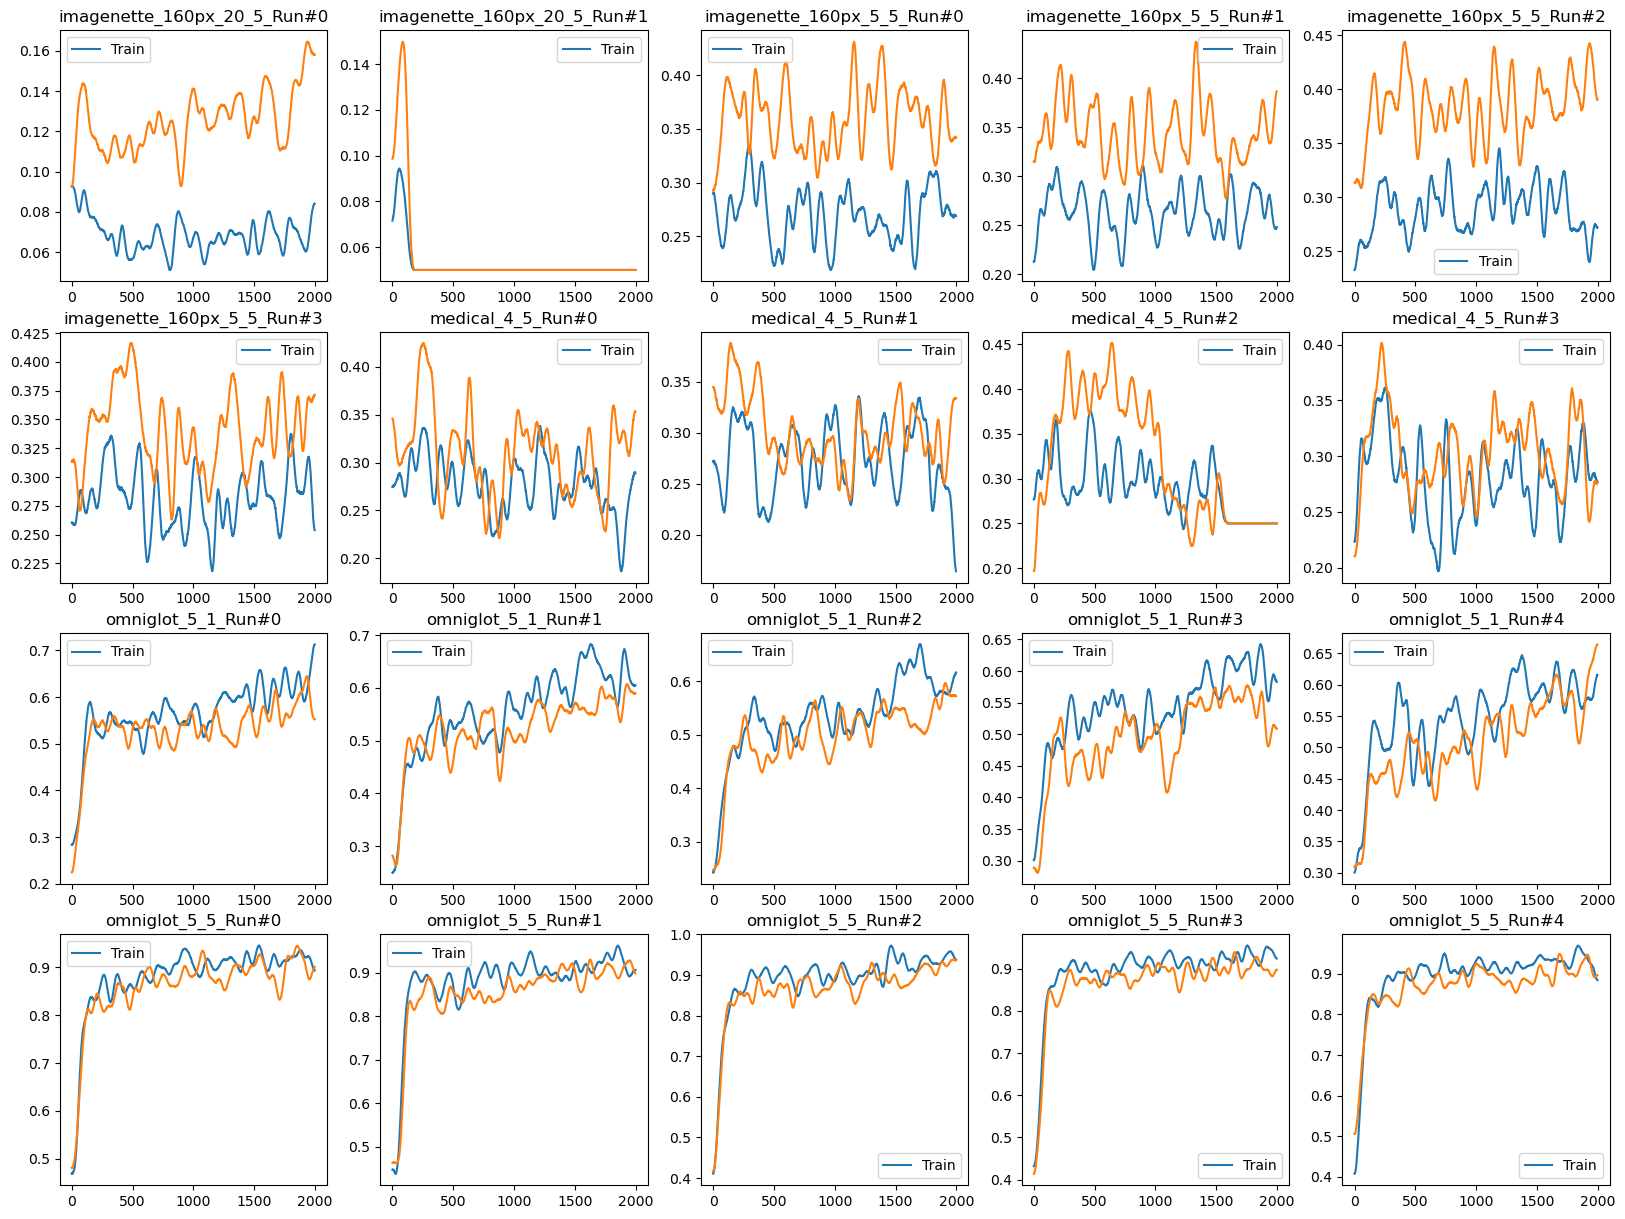

In [10]:
_, axarr = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))
i = 0
for a in range(4):
    for b in range(5):
            if i < len(CSVSTUFF):
                bag , pah = createGraph(100, CSVSTUFF[i][1], CSVSTUFF[i][2])
                axarr[a, b].set_title(CSVSTUFF[i][0])
                axarr[a, b].plot(bag)
                axarr[a, b].plot(pah)
                axarr[a, b].xaxis.set_visible(True)
                axarr[a, b].yaxis.set_visible(True)
                axarr[a, b].legend(['Train'])
                i+=1
                bag = None
                pah = None
            else:
                axarr[a, b].xaxis.set_visible(False)
                axarr[a, b].yaxis.set_visible(False)
plt.show()